

# Análisis Completo de Regresión Lineal

Este notebook muestra paso a paso cómo realizar un análisis de **Regresión Lineal** empleando un conjunto de datos que contiene:
- **valuationdate**: fecha de valoración (opcional para el modelo)
- **revenues**: ingresos
- **ebit**: utilidad antes de intereses e impuestos
- **depreciation**: depreciación
- **capex**: gastos de capital
- **ncwc**: cambio en capital de trabajo neto
- **bv**: (posiblemente) valor en libros
- **y**: variable objetivo que deseamos predecir (por ejemplo, un valor financiero o de valoración)

Iremos desde la **carga** y **exploración** del dataset hasta la **interpretación** de coeficientes y la **evaluación** de métricas importantes.

In [5]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv

--2025-03-05 22:48:23--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv [following]
--2025-03-05 22:48:23--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82415 (80K) [text/plain]
Saving to: ‘enterprise.csv’

enterprise.csv      100%[==============

## Paso 0: Importar librerías y configuración

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

## Paso 1: Carga y Exploración de Datos (EDA)

En este primer bloque, cargaremos nuestro dataset y realizaremos un Análisis Exploratorio básico.

In [7]:
# prompt: En este primer bloque, cargaremos nuestro dataset

df = pd.read_csv('enterprise.csv')
df.head()


,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
0,30/06/2011,86470.7000,10387.500000,6429.000,3512.000,16848.90000,47945.100,91760.80000
1,31/12/2010,84754.2000,14031.180800,8658.600,17172.500,12095.10000,66804.400,184461.70000
2,30/09/2016,15653.4800,221.347452,647.239,749.478,1468.42800,10128.726,23323.68520
3,30/09/2018,62001.3297,7551.761957,1808.830,2702.850,11873.25464,27144.930,130202.79240
4,30/09/2014,1242.8300,497.141501,232.027,1552.908,149.97100,1463.052,11472.12267


  valuationdate    revenues          ebit  depreciation      capex  \
0    30/06/2011  86470.7000  10387.500000      6429.000   3512.000   
1    31/12/2010  84754.2000  14031.180800      8658.600  17172.500   
2    30/09/2016  15653.4800    221.347452       647.239    749.478   
3    30/09/2018  62001.3297   7551.761957      1808.830   2702.850   
4    30/09/2014   1242.8300    497.141501       232.027   1552.908   

          ncwc         bv             y  
0  16848.90000  47945.100   91760.80000  
1  12095.10000  66804.400  184461.70000  
2   1468.42800  10128.726   23323.68520  
3  11873.25464  27144.930  130202.79240  
4    149.97100   1463.052   11472.12267  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valuationdate  1061 non-null   object 
 1   revenues       1061 non-null   float64
 2   ebit           1061 non-null   float64
 

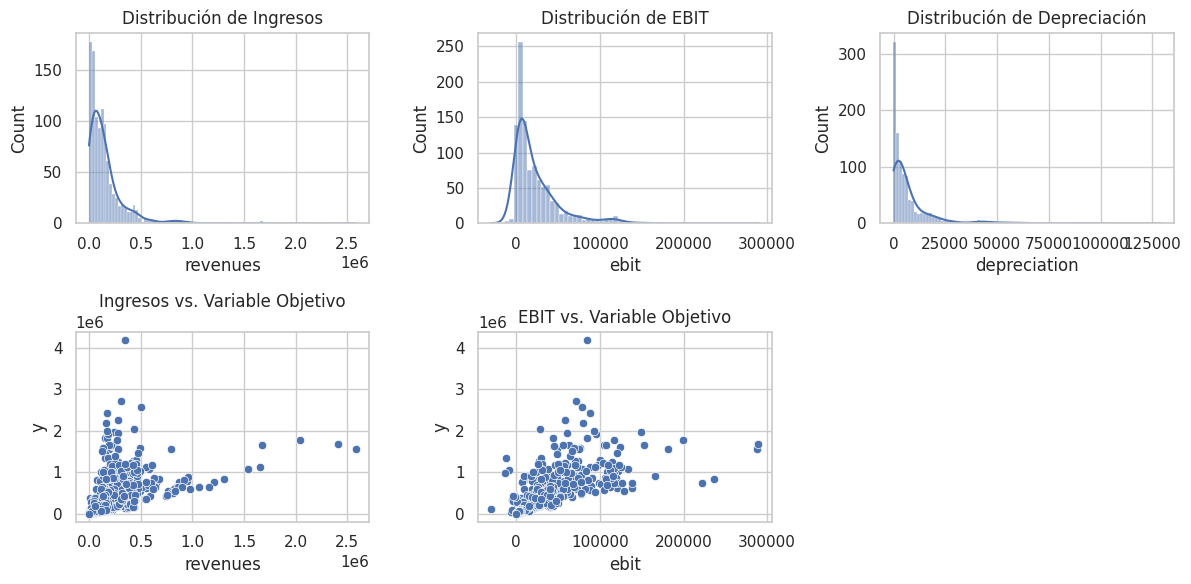

In [8]:
# prompt: realizaremos un Análisis Exploratorio básico.

# Ver las primeras filas del DataFrame
print(df.head())

# Obtener información general del DataFrame
print(df.info())

# Estadísticas descriptivas del DataFrame
print(df.describe())

# Verificar si existen valores nulos
print(df.isnull().sum())

# Visualizar la distribución de las variables (ejemplos)
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
sns.histplot(df['revenues'], kde=True)
plt.title('Distribución de Ingresos')

plt.subplot(2, 3, 2)
sns.histplot(df['ebit'], kde=True)
plt.title('Distribución de EBIT')

plt.subplot(2, 3, 3)
sns.histplot(df['depreciation'], kde=True)
plt.title('Distribución de Depreciación')


plt.subplot(2, 3, 4)
sns.scatterplot(x='revenues', y='y', data=df)
plt.title('Ingresos vs. Variable Objetivo')


plt.subplot(2, 3, 5)
sns.scatterplot(x='ebit', y='y', data=df)
plt.title('EBIT vs. Variable Objetivo')

plt.tight_layout()
plt.show()

### Estadísticas Descriptivas y Distribuciones

In [9]:
df.describe()

,revenues,ebit,depreciation,capex,ncwc,bv,y
count,1.061000e+03,1061.000000,1061.000000,1061.000000,1061.000000,1.061000e+03,1.061000e+03
mean,1.632727e+05,24076.406810,8002.050367,10961.602205,22324.130946,8.057162e+04,3.292238e+05
std,2.213828e+05,31871.076559,13898.135849,20250.735197,54636.421540,1.043500e+05,4.056701e+05
min,8.560000e+01,-29982.979880,-5.690000,-694.661000,-118819.899000,-1.503965e+04,3.692000e+02
25%,4.265958e+04,4522.900000,999.340000,1666.600000,3115.247000,1.689500e+04,6.981010e+04
50%,1.082011e+05,12224.611950,3446.250000,4949.447000,10736.200000,4.172290e+04,1.850416e+05
75%,1.862485e+05,32228.941870,8361.220000,11201.479000,23454.185000,1.147563e+05,4.258273e+05
max,2.586712e+06,289541.300000,128993.500000,205525.700000,623588.700000,1.009026e+06,4.175892e+06


### Preguntas de Reflexión (Exploración)
1. ¿Qué tipo de problema estás intentando resolver al usar `y` como variable objetivo?
2. ¿Notas valores atípicos (outliers) en alguna de las variables? ¿Cómo podría afectar a la regresión lineal?
3. ¿Crees que la columna `valuationdate` podría aportar información para predecir `y`, o la excluirías del análisis?

_Responde con tu razonamiento propio aquí._

Se intenta predecir la variable 'y', que representa probablemente un valor financiero o de valoración de una empresa, basándose en variables como ingresos, EBIT, depreciación, CAPEX, y cambio en capital de trabajo.  La presencia de outliers en variables como 'revenues', 'ebit' o 'depreciation' podría afectar negativamente la regresión lineal, ya que este modelo es sensible a valores extremos que pueden sesgar la línea de mejor ajuste.  La columna 'valuationdate' podría ser relevante, ya que los valores financieros pueden fluctuar con el tiempo, pero se necesitaría procesarla adecuadamente (por ejemplo, extraer características como el año o el trimestre) para que sea útil en un modelo de regresión lineal.  Si no se extraen características de la fecha, podría considerarse irrelevante o incluso perjudicial para el modelo.


## Paso 2: Preparación y Limpieza de Datos

1. **Manejo de valores faltantes**.
2. **Posible eliminación** o **imputación** de outliers.
3. **Transformaciones** (escalado, log, etc.) si son necesarias.

In [10]:
# prompt: Manejo de valores faltantes.
# Posible eliminación o imputación de outliers.
# Transformaciones (escalado, log, etc.) si son necesarias.

# Manejo de valores faltantes (si existen)
# Ejemplo: Rellenar valores faltantes en 'ncwc' con la mediana
if df['ncwc'].isnull().any():
    df['ncwc'].fillna(df['ncwc'].median(), inplace=True)

# Detección y manejo de outliers (ejemplo con 'revenues')
# Usando el rango intercuartílico (IQR)
Q1 = df['revenues'].quantile(0.25)
Q3 = df['revenues'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Opción 1: Eliminar outliers
df = df[(df['revenues'] >= lower_bound) & (df['revenues'] <= upper_bound)]

# Opción 2: Imputar outliers (reemplazar con los límites)
# df.loc[df['revenues'] < lower_bound, 'revenues'] = lower_bound
# df.loc[df['revenues'] > upper_bound, 'revenues'] = upper_bound

# Transformaciones (ejemplo: log-transformación de 'revenues' si es necesario)
# Verificar si la distribución de 'revenues' es sesgada
# Si es muy sesgada (cola larga a la derecha) aplicamos log
if df['revenues'].skew() > 1 : # Puedes ajustar el valor umbral
    df['revenues_log'] = np.log1p(df['revenues']) # Usamos log1p para evitar log(0)
    # Luego, usaremos 'revenues_log' en lugar de 'revenues' en el modelo
    df.drop('revenues', axis=1, inplace=True)
    # Renombramos la columna para mayor claridad
    df = df.rename(columns={'revenues_log':'revenues'})


# Escalado de características (opcional, pero recomendado para algunos algoritmos)
# Ejemplo con StandardScaler
from sklearn.preprocessing import StandardScaler

# Seleccionar las características a escalar (excluir 'y' y 'valuationdate')
features_to_scale = ['revenues', 'ebit', 'depreciation', 'capex', 'ncwc', 'bv']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Eliminar la columna 'valuationdate' (si se decide)
# df.drop('valuationdate', axis=1, inplace=True) # Descomentar si decides eliminarla

print(df.head())
print(df.describe())


  valuationdate  revenues      ebit  depreciation     capex      ncwc  \
0    30/06/2011 -0.285471 -0.378405      0.006575 -0.345067 -0.011406   
1    31/12/2010 -0.304500 -0.228640      0.213744  0.550350 -0.127564   
2    30/09/2016 -1.070563 -0.796262     -0.530651 -0.526145 -0.387225   
3    30/09/2018 -0.556743 -0.494962     -0.422719 -0.398106 -0.132985   
4    30/09/2014 -1.230322 -0.784926     -0.569231 -0.473482 -0.419442   

         bv             y  
0 -0.214964   91760.80000  
1  0.034336  184461.70000  
2 -0.714857   23323.68520  
3 -0.489921  130202.79240  
4 -0.829408   11472.12267  
           revenues          ebit  depreciation         capex          ncwc  \
count  9.670000e+02  9.670000e+02  9.670000e+02  9.670000e+02  9.670000e+02   
mean  -1.359363e-16 -2.351331e-16  2.388070e-17 -1.065447e-16  4.408745e-17   
std    1.000517e+00  1.000517e+00  1.000517e+00  1.000517e+00  1.000517e+00   
min   -1.243151e+00 -2.037743e+00 -5.913194e-01 -6.208054e-01 -3.326452e+00  

<ipython-input-10-8c80f676274c>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


### Pregunta de Reflexión (Limpieza)
¿Por qué es relevante tratar valores faltantes y/o outliers **antes** de entrenar el modelo de regresión lineal?

_Responde con tu razonamiento aquí._


No hay outliers

En resumen, valores faltantes y outliers introducen ruido y distorsiones en los datos, y esto se traduce en un modelo de regresión lineal menos preciso, menos robusto, y con menor capacidad para generalizar a nuevos datos.  La limpieza previa de datos es, por lo tanto, fundamental para obtener resultados significativos y confiables.


## Paso 4: Selección de Variables e Implementación del Modelo

1. **Seleccionar** cuáles columnas usarás como variables explicativas (features). Puede que uses todas o hagas una selección.
2. **Asignar** `X` (features) y `y` (variable objetivo).
3. **Dividir** en conjunto de entrenamiento (train) y conjunto de prueba (test).

In [11]:
df.shape

(967, 8)

In [13]:
X = df[['revenues', 'ebit', 'depreciation', 'capex', 'ncwc', 'bv']]
y = df['y']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
                                                  X,  # Asegurar 2D para sklearn
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42
                                              )

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")

Entrenamiento: 773 muestras
Prueba: 194 muestras


### Preguntas de Reflexión (Selección de Variables)
1. ¿Por qué es importante separar los datos en train y test?
2. ¿Qué pasaría si entrenas y evalúas en el **mismo** conjunto de datos?

_Responde con tu razonamiento._

Separar los datos en conjuntos de entrenamiento (train) y prueba (test) es crucial para evaluar la capacidad de generalización de un modelo de Machine Learning.  Entrenar y evaluar en el mismo conjunto de datos lleva a un sobreajuste (overfitting).  El modelo aprendería los datos de entrenamiento demasiado bien, incluyendo el ruido y las particularidades específicas de ese conjunto, pero no sería capaz de predecir correctamente nuevos datos que no ha visto antes.  En esencia, el modelo memorizaría los datos de entrenamiento en lugar de aprender las relaciones subyacentes entre las variables.  La evaluación en el conjunto de prueba, que no se utiliza durante el entrenamiento, proporciona una medida realista de cómo se desempeñará el modelo en datos reales, permitiendo detectar si el modelo generaliza bien o sufre de sobreajuste.

Se entrena y se evalua diferente para probar si el modlo de verdad funciona

## Paso 5: Entrenar el Modelo de Regresión Lineal
Usaremos la clase `LinearRegression` de scikit-learn.

In [15]:
# Crear instancia del modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Extraer los coeficientes
intercept = model.intercept_
coef = model.coef_[0]

print(f"Intercept (beta_0): {intercept:.2f}")
print(f"Coeficiente (beta_1): {coef:.2f}")

Intercept (beta_0): 279575.72
Coeficiente (beta_1): 25804.32


### Interpretación de Coeficientes
Si la lista de features es `["revenues", "ebit", "depreciation", "capex", "ncwc", "bv"]` y tu `model.coef_` es algo como `[a, b, c, d, e, f]`, entonces:

\[ y \approx \beta_0 + a\cdot revenues + b\cdot ebit + c\cdot depreciation + d\cdot capex + e\cdot ncwc + f\cdot bv \]

Cada coeficiente indica cómo cambia `y` en promedio **por cada unidad** que se incrementa la variable (manteniendo las demás constantes).

## Paso 6: Evaluación y Validación del Modelo
Usaremos las siguientes métricas:
- **MSE (Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **R² (Coeficiente de Determinación)**

In [17]:
# prompt: MSE (Mean Squared Error)
# MAE (Mean Absolute Error)
# R² (Coeficiente de Determinación)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate MAE
mae = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 82563880457.01
Mean Absolute Error (MAE): 123500.88
R-squared (R²): 0.56


### Preguntas de Reflexión (Evaluación)
1. ¿Por qué comparamos las métricas en **Entrenamiento** vs **Prueba**?
2. ¿Qué significa si el error en entrenamiento es **muy** distinto (mucho menor o mucho mayor) que en prueba?
3. ¿Cómo interpretar un **R²** cercano a 1, cercano a 0 o incluso negativo?

_Responde con tu razonamiento._

Comparar las métricas en entrenamiento vs. prueba es crucial para evaluar la capacidad de generalización del modelo.  El error en entrenamiento nos dice qué tan bien el modelo se ajusta a los datos que ya ha visto.  El error en prueba nos dice qué tan bien el modelo predice datos nuevos que no ha visto durante el entrenamiento.


Si el error en entrenamiento es mucho menor que en prueba, significa que el modelo está sobreajustado (overfitting). Ha aprendido los detalles específicos y el ruido de los datos de entrenamiento, pero no ha logrado capturar las relaciones subyacentes que le permitirían generalizar a nuevos datos.  Si el error de entrenamiento es mucho mayor que en prueba, puede indicar un problema en los datos (ej: una partición no representativa, o algún error en la separación de datos de entrenamiento vs prueba) o que el modelo no ha aprendido bien, es decir, subajuste (underfitting).


Un R² cercano a 1 indica que el modelo explica muy bien la varianza de los datos.  Cuanto más cercano a 1, mejor es el ajuste del modelo a los datos, es decir, se ajusta bien a la tendencia de los datos. Un R² cercano a 0 implica que el modelo no explica la varianza de los datos; en otras palabras, el modelo no es mejor que simplemente utilizar la media de los datos como predicción.  Un R² negativo indica que el modelo es peor que simplemente utilizar la media de los datos como predicción.  Esto suele ser una señal de que hay un problema en el modelo o en los datos.


### Pregunta de Reflexión (Residuos)
Si observas un patrón claro en la gráfica de residuos (por ejemplo, forma de U), ¿qué podría indicar respecto a las **asunciones** de la regresión lineal?

_Responde con tu razonamiento._

Si se observa un patrón claro en forma de U en la gráfica de residuos, esto indica una violación de la asunción de linealidad en la regresión lineal.  La regresión lineal asume una relación lineal entre las variables independientes y la variable dependiente.  Una forma de U en los residuos sugiere que la relación real entre las variables es curvilínea, y la línea recta ajustada por la regresión lineal no captura adecuadamente esta curvatura.  En consecuencia, las predicciones del modelo serán menos precisas, y las inferencias estadísticas sobre los coeficientes pueden ser incorrectas.  Se debería considerar la transformación de las variables o la inclusión de términos polinómicos en el modelo para capturar mejor la relación no lineal entre las variables.


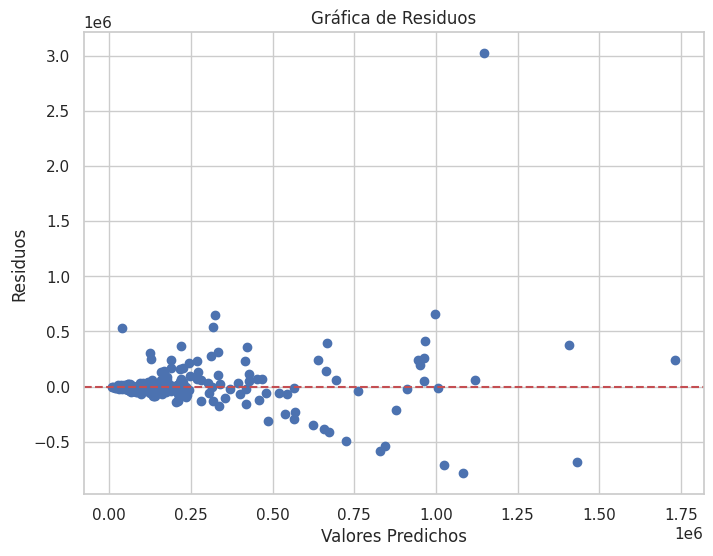

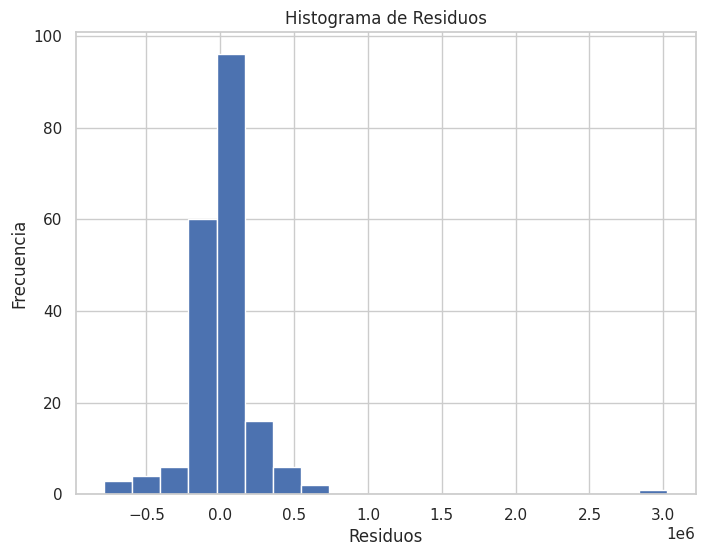

In [18]:
# prompt: a gráfica de residuos (por ejemplo, forma de U), ¿qué podría indicar respecto a las **asunciones** de la regresión lineal

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfica de Residuos")
plt.show()

#Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)  # Adjust the number of bins as needed
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()


## Paso 8: Interpretación y Conclusiones

1. **Revisa** los coeficientes: ¿son consistentes con la lógica de negocio? (p.ej., si `ebit` aumenta, esperas que `y` aumente o disminuya?).
2. **Observa** el nivel de error y R²: ¿el modelo es suficientemente bueno para su uso práctico?
3. **Considera** la posibilidad de:
   - Añadir más variables.
   - Aplicar **regresiones polinómicas** (X², X³) si sospechas no linealidad.
   - Usar **regularización** (Ridge, Lasso) si hay multicolinealidad o se requieren coeficientes más estables.

Para revisar la consistencia de los coeficientes con la lógica de negocio, necesitamos ver los valores de `model.coef_`.  Si un coeficiente asociado a `ebit` es positivo, significa que un aumento en el `ebit` predice un aumento en `y` (la variable objetivo), lo cual es consistente con la lógica financiera.  Un coeficiente negativo sugeriría lo contrario, lo cual podría ser un indicio de un problema en el modelo o los datos.  Se debe analizar cuidadosamente cada coeficiente en relación con la variable a la que está asociado.


La calidad del modelo se evalúa con el nivel de error (MSE, MAE) y el R².  Un MSE y MAE bajos indican que el modelo predice bien.  Un R² cercano a 1 indica un buen ajuste, mientras que uno cercano a 0 o negativo indica un mal ajuste.  Para determinar si el modelo es suficientemente bueno, es necesario definir un umbral aceptable para el error y R² basado en los requerimientos del negocio.  Si el modelo no cumple con estos umbrales, se podrían considerar mejoras.


La gráfica de residuos y el histograma de residuos proporcionan información sobre las asunciones de la regresión lineal. Si hay un patrón en los residuos o no siguen una distribución normal, se pueden considerar las siguientes opciones:

*   **Añadir más variables**: Si el modelo actual no captura todas las variables relevantes, incluir nuevas variables podría mejorar su precisión.
*   **Regresiones polinómicas**: Si los residuos presentan un patrón que sugiere una relación no lineal, usar términos polinómicos (X², X³) puede capturar mejor la relación entre las variables.
*   **Regularización**: Si se sospecha multicolinealidad (alta correlación entre variables predictoras) o se buscan coeficientes más estables, la regularización (Ridge o Lasso) puede mejorar el modelo.


### Preguntas de Reflexión Final
1. ¿Crees que la Regresión Lineal Simple/Múltiple **captura adecuadamente** las relaciones en tus datos?
2. ¿Qué otras técnicas (ej. árboles de decisión, bosques aleatorios, etc.) considerarías para comparar resultados?
3. ¿El dataset es suficientemente grande y variado para hacer conclusiones robustas?

_Responde con tu razonamiento._

La regresión lineal, si bien es un buen punto de partida, puede no capturar adecuadamente todas las relaciones en los datos.  La linealidad es una suposición crucial, y si las relaciones entre las variables son no lineales (lo cual podría sugerir la gráfica de residuos), la regresión lineal podría estar subestimando el rendimiento potencial.

Para comparar resultados, consideraría técnicas no lineales como:

* **Árboles de decisión:** Capturan relaciones no lineales y son fáciles de interpretar.  Podrían revelar interacciones entre las variables que la regresión lineal no identifica.
* **Bosques aleatorios:**  Son un ensamble de árboles de decisión, lo que mejora la precisión y reduce el sobreajuste, ofreciendo una mejor generalización.
* **Máquinas de vectores de soporte (SVM):**  Pueden modelar relaciones complejas en los datos.
* **Redes neuronales:**  Son capaces de aproximar funciones altamente no lineales, pero requieren más datos y un ajuste cuidadoso.

El tamaño del dataset no se proporciona explícitamente en el código. El número de muestras (filas) es pequeño, y por tanto, la robustez de las conclusiones será limitada. Un conjunto de datos más grande, especialmente con mayor variación en las variables independientes, daría como resultado un modelo más robusto y generalizable.  La pequeña cantidad de datos sugiere la posibilidad de sobreajuste, donde un modelo complejo se ajusta perfectamente al conjunto de entrenamiento pero no generaliza bien a nuevos datos.  Para este caso específico, el modelo de regresión lineal probablemente se beneficiaría de más datos.  Adicionalmente, una exploración más detallada de la distribución de las variables, la correlación entre ellas y la presencia de variables colineales puede informar si otras técnicas, como regularización, son pertinentes.


## Resumen
En este Notebook hemos:
1. **Explorado** los datos (EDA) y detectado posibles outliers.
2. **Limpieza** de datos y transformaciones opcionales.
3. **Seleccionado** variables y dividido en train/test.
4. **Entrenado** un modelo de Regresión Lineal.
5. **Evaluado** con MSE, MAE, R² y analizado residuos.
6. **Reflexionado** sobre los coeficientes y conclusiones.

¡Has completado un **análisis de regresión lineal** de forma integral! Para afianzar, puedes:
- Ajustar parámetros (aunque la regresión lineal simple en sklearn no tiene muchos).
- Comparar con otros modelos.
- Realizar validación cruzada en lugar de una simple división train/test.

¡Éxitos en tu proyecto de análisis!